# ESERCIZIO 3
Prima di cominciare ricodate che il comando ```help(•)``` può esserve utilizzato per accedere alla documentazione relativa all'argomento.  
Poi, useremo alcune librerie di python, tra cui ```numpy```, ```pandas```, ```scipy``` e ```matplotlib```, per importarle è sufficiente utilizzare la keywork ```import```  .  
Con ```type(•)``` potete controllare il tipo dell'oggetto che inserite come argomento.
- ```pandas.read.csv(•)``` è il metodo per caricare file csv.
    - il primo argomento è il path al file da caricare.
    - l'argomento ```sep``` indica il separatore tra i campi.
    - l'argomento ```decimal``` indica il separatore per il numeri float.

In [2]:
import pandas
import matplotlib.pyplot as plt
data = pandas.read_csv("carsharing.csv", sep=";", decimal=",")
data.iloc[[1,3,2,4,5],0:7]

,CarIdentifier,TimeFrame,RushHour,PremiumCustomer,Distance,Time
1,103,FRAME D,1,1,5.3,13.9
3,110,FRAME D,1,1,2.8,5.0
2,105,FRAME D,1,-1,0.4,4.1
4,110,FRAME B,1,-1,2.7,5.6
5,111,FRAME C,0,-1,11.8,13.2


Una delle caratteristiche più importanti è l'indicizzazione, di seguito alcune regole:
- ```data.iloc[•,•]``` serve per indicizzare utilizzando le interi.
- ```data.loc[•,•]```  serve per indicizzare utilizzando labels.
- il primo argomento è per le righe, il secondo per le colonne.
- ```:``` indica tutta gli elementi.
- ```a:b``` indica tutti gli elementi partendo da ```a``` fino a ```b``` escluso.
- ```a:``` indica da ```a``` fino alla fine.
- ```:b``` indica dall'inizio fino alla fine.
- ```:-b``` indica dall'inizio fino alla fine, tolti gli ultimi ```b``` elementi.
- possono essere utilizzate delle liste ```[1,2,3,4,42,69]``` come argomenti.
- possono essere utilizzare delle liste di labes, per esempio ```["Distance", "time"]```.
- possono essere utilizzate espressioni booleane, per esempio ```data.loc[data.Distance > 5, ["Distance", "Time"]]```
- se si indica una sola colonna o una sola riga senza utilizzare le list (```[•]```) allora pandas ritorna, non un dataframe, ma una series.

## 3.1. Quanti casi contiene il file?

In [2]:
print(data.shape[0])
print(len(data))

392
392


I precedenti sono modi equivalenti per conoscere il numero di righe:  
- ```data.shape[0]``` ritorna il numero di elementi per tutte le dimensioni.  
- ```len(•)``` di un dataframe ritorna il numero di righe.  

## 3.2. Analizziamo l’utilizzo del servizio di car sharing nelle diverse fasce orarie (carattereTimeFrame) e negli orari di maggior o minor traffico (carattere RushHour)
### 3.2.1. Il carattereTimeFrame è nominale, ordinale o scalare? Giustificate la risposta.

In [3]:
data.loc[:,"TimeFrame"].unique()

array(['FRAME D', 'FRAME B', 'FRAME C', 'FRAME E', 'FRAME A'],
      dtype=object)

TimeFrame ha carattere nominale in quanto non può essere stabilito un ordinamento tra i suoi valori.
### 3.2.2. In quante fasce orarie è stata suddivisa una giornata?

In [4]:
data.loc[:,"TimeFrame"].nunique()

5

### 3.2.3 In quali fasce orarie il servizio di car sharing è stato maggiormente utilizzato?

In [5]:
data.loc[:,"TimeFrame"].value_counts()

FRAME B    123
FRAME C    107
FRAME D     94
FRAME A     47
FRAME E     21
Name: TimeFrame, dtype: int64

### 3.2.4. Calcolate la tabella delle frequenze congiunte di TimeFrame e RushHour.

In [6]:
a = data.loc[:,["TimeFrame","RushHour"]]
pandas.crosstab(data.loc[:,"TimeFrame"],data.loc[:,"RushHour"])

RushHour,0,1
TimeFrame,,
FRAME A,47,0
FRAME B,0,123
FRAME C,107,0
FRAME D,0,94
FRAME E,21,0


```pandas.crosstab(•,•)``` si occupa di calcolare la tabella di contingenza.  
Il primo argomento finirà per rappresentare le colonne.
Il second argomento finirà per rappresentare le righe.
### 3.2.5. Leggendo la tabella calcolata al punto precedente determinate quali sono le fasceorarie che corrispondono all’ora di punta.
Decisamente il Frame A e il B.
## 3.3. Consideriamo, solo in questo punto dell’esercizio, i clienti che hanno aderito al programma Premium (Premium=1)
### 3.3.1. Quanti sono?

In [28]:
len(data.loc[data.PremiumCustomer==1,])

227

### 3.3.2. Calcolate la distanza media percorsa in un tragitto da un cliente che ha aderito al programma Premium.

In [27]:
data.loc[data.PremiumCustomer==1,"Distance"].mean()

8.437444933920705

## 3.4. Ritorniamo a considerare il dataset completo e studiamo la distanza percorsa in ciascunutilizzo del servizio (carattereDistance).
### 3.4.1. Il carattere Distance è nominale, ordinale o scalare? Giustificate la risposta.
La distanza può assumere valori in &#x211d; (è una variabile quantitative continua), quindi scalare.
### 3.4.2. Tracciate il boxplot di tale carattere.

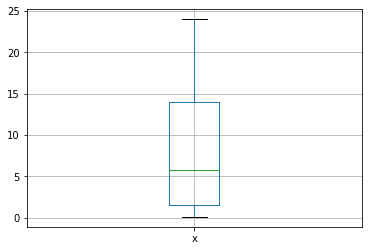

In [9]:
plot = pandas.DataFrame.boxplot(data.loc[:,"Distance"])

### 3.4.3. In base all’aspetto del grafico ottenuto al punto precedente, determinate quali sono gli indici di centralità e di dispersione che meglio caratterizzano la distanza percorsa, calcolandone il valore.

In [3]:
print("max:    ", data.loc[:,"Distance"].max())
print("q1:     ", data.loc[:,"Distance"].quantile(0.25))
print("median: ", data.loc[:,"Distance"].median())
print("q2:     ", data.loc[:,"Distance"].quantile(0.50))
print("q3:     ", data.loc[:,"Distance"].quantile(0.75))
print("min:    ", data.loc[:,"Distance"].min())
print("IQR:    ", data.loc[:,"Distance"].quantile(0.75)
      -data.loc[:,"Distance"].quantile(0.25))

max:     24.0
q1:      1.5750000000000002
median:  5.75
q2:      5.75
q3:      14.025
min:     0.1
IQR:     12.45


### 3.4.4. Riscontrate una relazione tra la distanza percorsa e il Tempo? In caso affermativo, caratterizzate tale relazione. In ogni caso giustificate la vostra risposta mostrando un grafico.

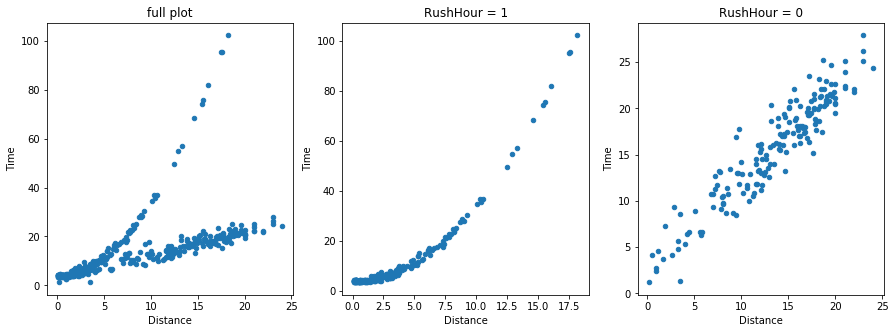

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(15,5)
plot = data.plot.scatter(x="Distance",y="Time",ax = ax[0],title="full plot")
plot = data.loc[data.RushHour == 1,:].plot.scatter(x="Distance",y="Time",
                                         ax = ax[1], title="RushHour = 1")
plot = data.loc[data.RushHour == 0,:].plot.scatter(x="Distance",y="Time",
                                        ax = ax[2], title="RushHour = 0")

Per brevi distanze l'andamento è il medesimo.  
Su distanze più lunghe si denotano due andamenti differenti.
La RushHour sembra essere responsabile delle differenze.
### 3.4.5. Calcolate l’indice di correlazione tra la distanza e Tempo.  Il valore ottenutosupporta la risposta che avete dato al punto precedente?

In [12]:
data.loc[:,["Distance","Time"]].corr()

,Distance,Time
Distance,1.000000,0.627399
Time,0.627399,1.000000


la correlazione indica che al crescere di ```Distance``` la ```Time``` cresce, come è ragionevole che sia.  
### 3.4.6. Tracciate, possibilmente nella stessa figura, il box plot della distanza nel caso di utilizzo dell’auto in orario di punta (RushHour=1) e in orario non di punta (RushHour=0).

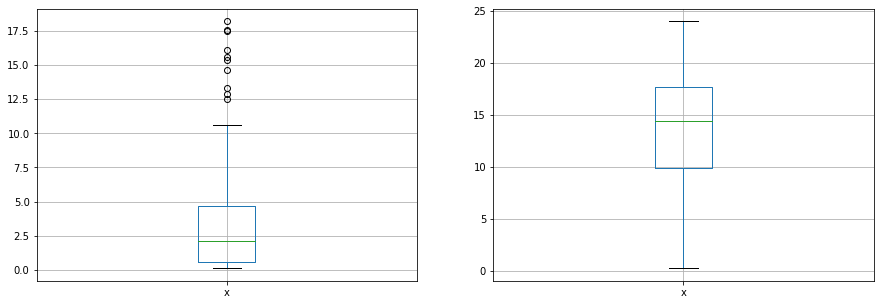

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,5)
plt0 = pandas.DataFrame.boxplot(data.loc[data.RushHour==1,"Distance"],ax=ax[0])
plt1 = pandas.DataFrame.boxplot(data.loc[data.RushHour==0,"Distance"],ax=ax[1])

### 3.4.7. Ispezionando i due grafici ottenuti al punto precedente, dite se negli orari di puntasono privilegiati spostamenti "più brevi" oppure "più lunghi" rispetto agli orari non di punta, giustificando la risposta.

Dal precedente grafico si può notare che:  
- quando ```RushHour=1``` il 50% degli spostamenti è "più breve", tra 0 e 5.  
- quando ```RushHour=0``` il 50% degli spostamenti è "più lungo", tra 10 e 20.
- dall'istogramma si nota anche che la distanza presenta una distribuzione bimodale, dove, le due mode corrispondono con i picchi delle distribuzioni quando la ```RushHour=0``` e quando ```RushHour=1```.

Di conseguenza, durante gli orari di punta sono privilegiati spostamenti brevi. 
### 3.4.8. Tracciate, possibilmente nella stessa figura, il box plot della distanza nel caso di utilizzo dell’auto da parte dei clienti che hanno aderito al programma Premium (Premium=1) e di quelli che non vi hanno aderito (Premium=-1).

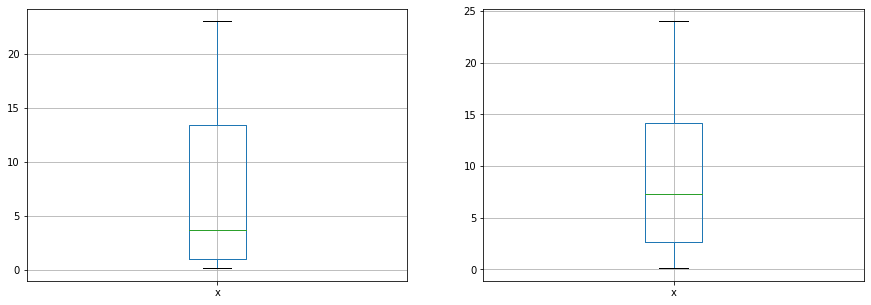

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,5)
plt0 = pandas.DataFrame.boxplot(data.loc[data.PremiumCustomer==-1,"Distance"],
                                ax=ax[0])
plt1 = pandas.DataFrame.boxplot(data.loc[data.PremiumCustomer==1,"Distance"],
                                ax=ax[1])

## 3.4.9. Ispezionando i due grafici ottenuti al punto precedente, notate una grossa differenzanelle distanze percorse dai clienti dei due gruppi?

Gli utenti premium tendono a percorerre distanze più lunghe rispetto agli utenti normali.
### 3.4.10. In Figura 1 è mostrato l’istogramma della distanza percorsa. In tale grafico si può individuare la presenza di due gruppi abbastanza distinti. I due gruppi sono relativi al tipo di cliente (Premium=1 oppure Premium=-1) oppure all’orario di utilizzo del veicolo (RushHour=1 oppure RushHour=0)? In altri termini, la distanza percorsa dipende dal fatto che l’utente sia un cliente Premium/non-Premium oppure dal fatto che l’utilizzo è avvenuto in orario Rush/non-Rush? Suggerimento: per rispondere a questa domanda basta ispezionarei boxplot prodotti nei punti precedenti di questo esercizio.

c'è un differenza nella distanza percorsa se l'utente è premium e non-premium.  
c'è un differenza nella distanza percorsa se l'utente sia nella RushHour e non-RushHour.  
nel secondo caso la differenza è più marcata e responsabile delle 2 mode nell'istogramma della distanza.

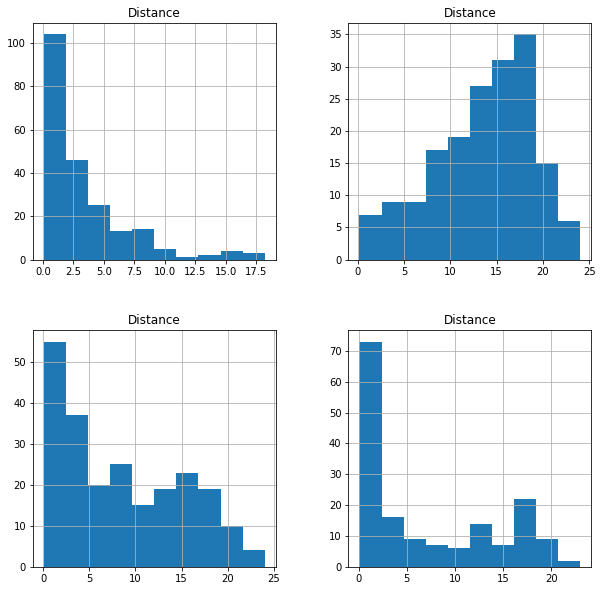

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10,10)
plt0 = pandas.DataFrame.hist(data.loc[data.RushHour == 1,:], column="Distance",
                             ax=ax[0,0])
plt1 = pandas.DataFrame.hist(data.loc[data.RushHour == 0,:], column="Distance",
                             ax=ax[0,1])
plt2 = pandas.DataFrame.hist(data.loc[data.PremiumCustomer == 1,:], column="Distance",
                             ax=ax[1,0])
plt3 = pandas.DataFrame.hist(data.loc[data.PremiumCustomer == -1,:], column="Distance",
                             ax=ax[1,1])

Questi 4 grafici evidenziano quello che è già stato notato.
### 3.4.11. Calcolate la distanza media nei due gruppi di orario (di punta/non di punta) e commentate l’istogramma di Figura 1 utilizzando queste due informazioni.

In [7]:
print("media in orario di punta    :", data.loc[data.RushHour == 1, "Distance"]
      .mean())
print("media in orario di non punta:", data.loc[data.RushHour == 0, "Distance"]
      .mean())

media in orario di punta    : 3.3193548387096796
media in orario di non punta: 13.487428571428563


In orario di punta si tende a percerrere distanze brevi, come avevamo già notato.
### 3.4.12. Sempre in riferimento ai due gruppi di orario (di punta/non di punta), calcolate la varianza within groups e la varianza between groups

In [11]:
group1 = data.loc[data.RushHour == 0, "Distance"]
group2 = data.loc[data.RushHour == 1, "Distance"]

size        = len(data.Distance)
size_group1 = len(group1)
size_group2 = len(group2)

mean        = data.Distance.mean()
mean_group1 = group1.mean()
mean_group2 = group2.mean()

var        = data.Distance.var()
var_group1 = group1.var()
var_group2 = group2.var()

variance_within_groups  = (size_group1/size)*var_group1 
+ (size_group2/size)*var_group2
variance_between_groups = (size_group1/size)*(mean_group1-mean)**2 
+ (size_group2/size)*(mean_group2-mean)**2

print("variance within  groups:", variance_within_groups)
print("variance between groups:", variance_between_groups)

variance within  groups: 13.127032899366636
variance between groups: 14.144144642299338


# Esercizio 4
## 4.1. Tracciate un grafico rappresentativo della distribuzione della distanza percorsa negli oraridi punta

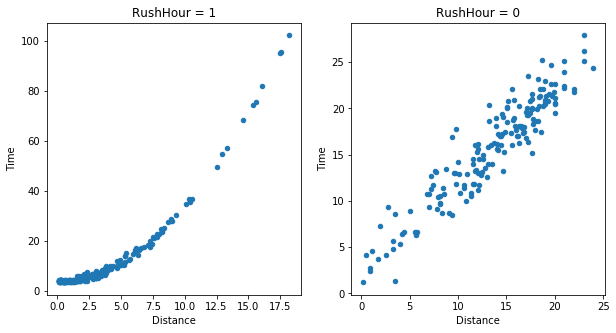

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,5)
plot0 = data.loc[data.RushHour == 1,:].plot.scatter(x="Distance",y="Time",
                                        ax = ax[0], title="RushHour = 1")
plot1 = data.loc[data.RushHour == 0,:].plot.scatter(x="Distance",y="Time",
                                        ax = ax[1], title="RushHour = 0")

In ore normali la crescità sembra lineare.  
Durante la RushHour la crescità è maggiore.
## 4.2. È plausibile affermare che negli orari di punta la distanza segue una legge normale? Giustificate la risposta.

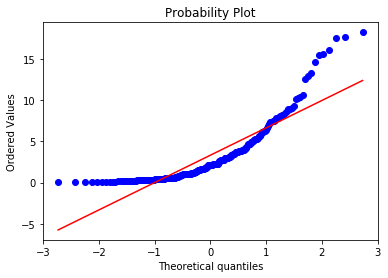

In [13]:
import scipy.stats as stats
plot = stats.probplot(data.loc[data.RushHour == 1,"Distance"], dist="norm",
                      plot=plt)

La distribuzione delle distanze sembra più essere esponenziale.
## 4.3. Calcolate la media e la deviazione standard della distanza negli orari di punta.

In [20]:
print("mean   :",data.loc[data.RushHour == 1,"Distance"].mean())
print("std dev:",data.loc[data.RushHour == 1,"Distance"].var()**0.5)

mean   : 3.319354838709678
std dev: 3.711106147915897


# ESERCIZIO 5
Concentriamoci ora sulla distanza percorsa dai veicoli negli orari non di punta.
## 5.1. Tracciate un grafico opportuno che descriva la distanza percorsa negli orari non di punta.

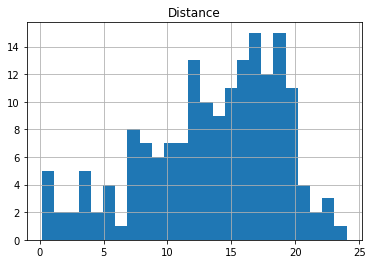

In [14]:
plt0 = pandas.DataFrame.hist(data.loc[data.RushHour == 0,:], 
                             column="Distance",bins=25)

## 5.2. È plausibile affermare che negli orari non di punta la distanza segue una legge normale? Giustificate la risposta.

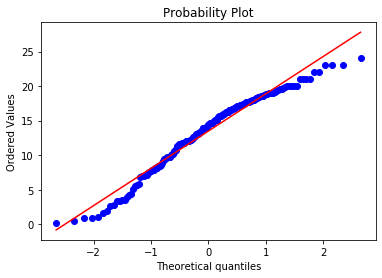

In [15]:
plot = stats.probplot(data.loc[data.RushHour == 0,"Distance"],
                      dist="norm", plot=plt)

ci si avvicina, ma non si direbbe.
# Esercizio 6
Selezionate in una variabile chiamata ```tragitti_brevi``` tutti i casi in cui il veicolo è stato utilizzato per percorrere un tragitto breve, cioè di lunghezza inferiore a 1.5 km.
## 6.1. Tracciate il grafico di dispersione della distanza e del tempo per i tragitti brevi.

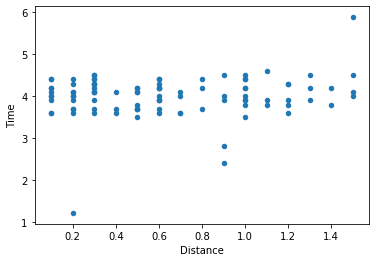

In [17]:
tragitti_brevi = data.loc[data.Distance <= 1.5,:]
plot = tragitti_brevi.plot.scatter(x="Distance",y="Time")

## 6.2. Commentate il grafico che avete tracciato al punto precedente, possibilmente collegandolo al valore assunto dall’indice di variazione per il carattere Time.

In [18]:
var       = tragitti_brevi.Time.var()
mean_Time = tragitti_brevi.Time.mean()
sd_Time   = tragitti_brevi.Time.var()**0.5
coeff_var = sd_Time/abs(mean_Time)
print("varianza                 :",var)
print("standard deviation       :",sd_Time)
print("coefficiente variazione  :",coeff_var)
print("coefficiente correlazione:\n",
      tragitti_brevi.loc[:,["Time","Distance"]].corr())

varianza                 : 0.23958342099726518
standard deviation       : 0.4894725947356656
coefficiente variazione  : 0.1223057477921858
coefficiente correlazione:
              Time  Distance
Time      1.00000   0.14576
Distance  0.14576   1.00000


Il tempo per tragitti brevi è praticamente costante.  
Questo lo si riscontra anche nel coefficiente di variazione che assume un valore particolarmente basso.  
Lo stesso è confermato dall'indice di correlazione tra ```Distance``` e ```Time```